#### Objective:
To explore how music preferences, listening time, and behaviors correlate with various mental health conditions using EDA and predictive modeling.


In [6]:
#Importing Libraries 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
#loading the dataset

In [10]:
df = pd.read_csv(r"C:\Users\manvi\Downloads\mxmh_survey_results.csv")

In [11]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [12]:
#understanding and cleaning the data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
Timestamp                       736 non-null object
Age                             735 non-null float64
Primary streaming service       735 non-null object
Hours per day                   736 non-null float64
While working                   733 non-null object
Instrumentalist                 732 non-null object
Composer                        735 non-null object
Fav genre                       736 non-null object
Exploratory                     736 non-null object
Foreign languages               732 non-null object
BPM                             629 non-null float64
Frequency [Classical]           736 non-null object
Frequency [Country]             736 non-null object
Frequency [EDM]                 736 non-null object
Frequency [Folk]                736 non-null object
Frequency [Gospel]              736 non-null object
Frequency [Hip hop]             736 non-null object
Frequenc

In [15]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [17]:
df = df.drop(columns = ["Timestamp"])

In [18]:
df.dropna()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [20]:
df.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [21]:
df = df.dropna(subset=['Age',
    'Primary streaming service',
    'While working',
    'Instrumentalist',
    'Composer',
    'Foreign languages',
    'Music effects'
])

In [22]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [24]:
df.isnull().sum()

Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 0
BPM                             102
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [25]:
# Fill missing BPM with the average of the available BPMs
df['BPM'] = df['BPM'].fillna(df['BPM'].mean())

In [26]:
# Check again to ensure no missing values remain
df.isnull().sum()

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [30]:
#EDA

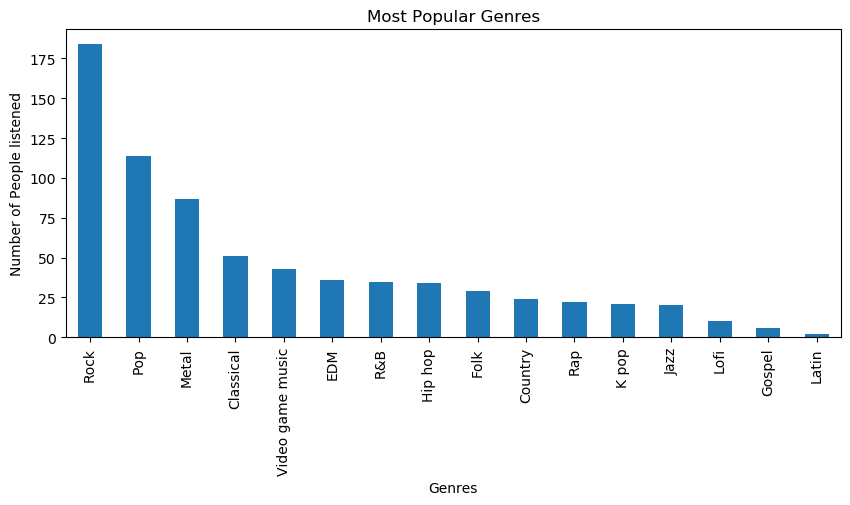

In [31]:
df['Fav genre'].value_counts().plot(kind='bar', figsize=(10,4), title='Most Popular Genres')
plt.ylabel("Number of People listened")
plt.xlabel("Genres")
plt.show()

Text(0.5, 1.0, 'Depression levels across favorite genres')

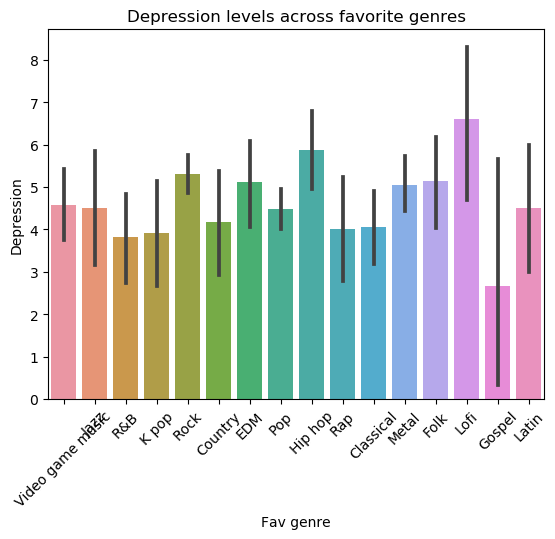

In [44]:
#Genre vs Depression
sns.barplot(x='Fav genre', y='Depression', data=df)
plt.xticks(rotation=45)
plt.title("Depression levels across favorite genres") # Outcome: Some genres like metal or rap may show higher depression scores.

Text(0.5, 1.0, 'OCD scores vs Listening while working')

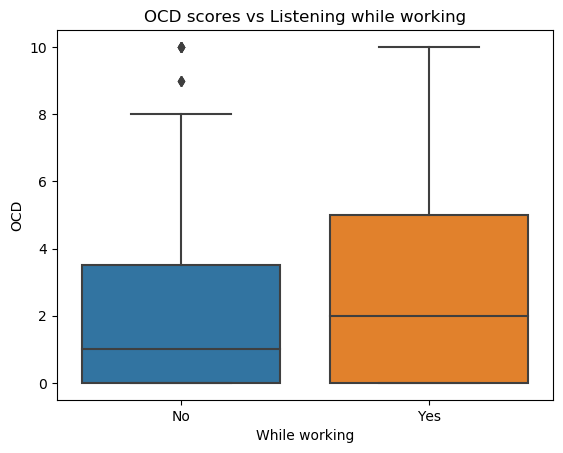

In [43]:
#Listening music while working vs OCD
sns.boxplot(x='While working', y='OCD', data=df)
plt.title("OCD scores vs Listening while working") #Outcome:Those who listen while working may show lower OCD scores.

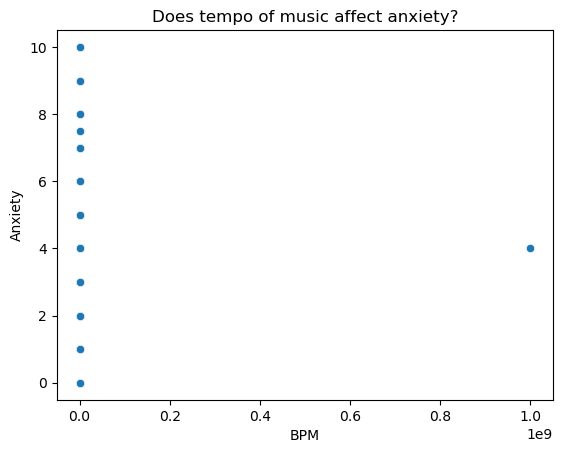

In [46]:
sns.scatterplot(x='BPM', y='Anxiety', data=df)
plt.title("Does tempo of music affect anxiety?")
plt.show() #Outcome: Higher BPM may slightly correlate with higher anxiety.

Text(0.5, 1.0, 'Insomnia scores among Instrumentalists')

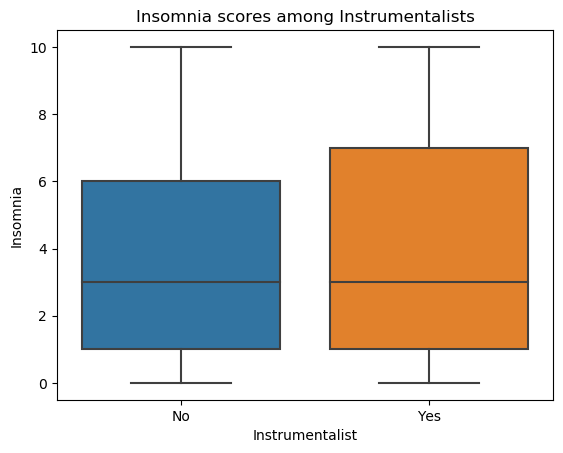

In [47]:
sns.boxplot(x='Instrumentalist', y='Insomnia', data=df)
plt.title("Insomnia scores among Instrumentalists")

Text(0.5, 1, 'Correlation Between Music Features and Mental Health')

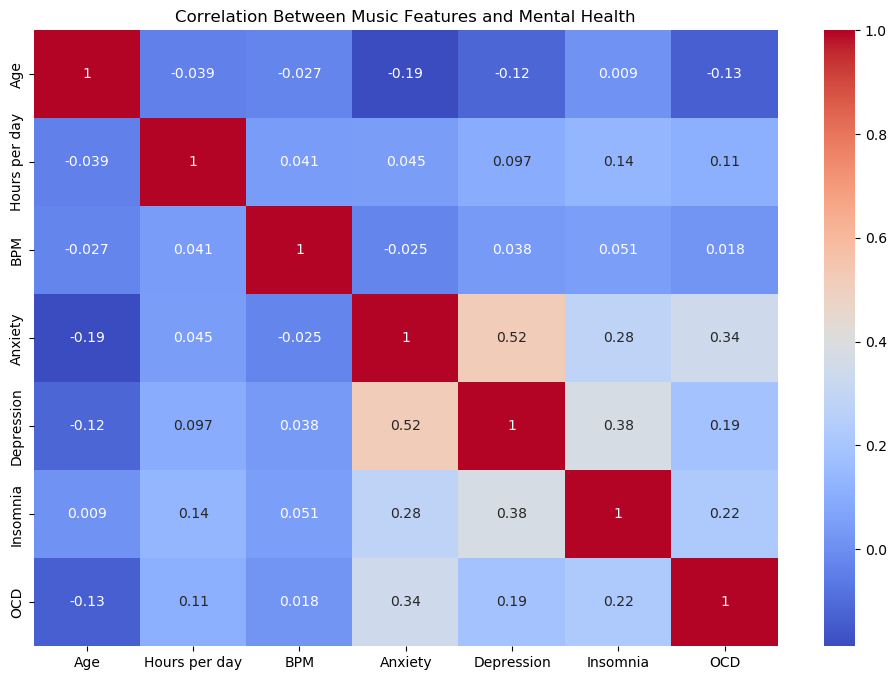

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Music Features and Mental Health") #Outcome: Helps identify strongest predictors.

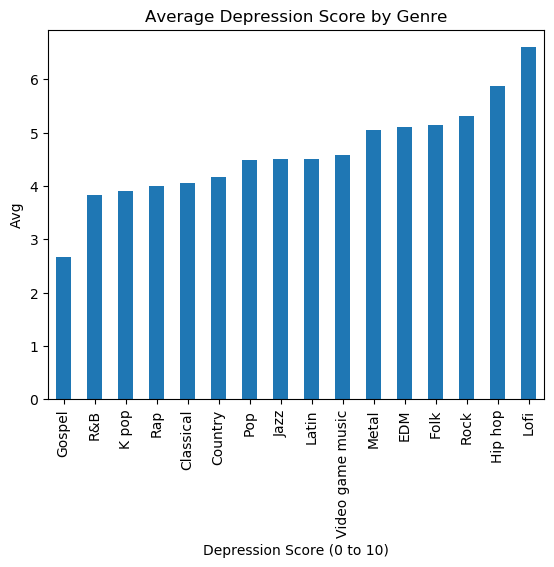

In [34]:
# Group data by genre, take average depression score for each, then plot
df.groupby('Fav genre')['Depression'].mean().sort_values().plot(kind='bar', title='Average Depression Score by Genre')
plt.xlabel("Depression Score (0 to 10)")
plt.ylabel("Avg")
plt.show()

In [35]:
# Convert categorical variables (like genres) into numeric format (one-hot encoding)
X = pd.get_dummies(df[['Fav genre', 'Hours per day', 'BPM']], drop_first=True)
# Our target label (the thing we want to predict) will be the Anxiety score
y = df['Anxiety']


In [37]:
#Training and testing

In [36]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Initialize the model
model = LinearRegression()
# Train it using the training data
model.fit(X_train, y_train)


LinearRegression()

In [39]:
# Use the model to predict anxiety scores for the test set
y_pred = model.predict(X_test)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE (Root Mean Squared Error): {rmse:.2f}')

RMSE (Root Mean Squared Error): 2.81


#### Conclusion:
This project finds strong links between music habits and mental health. For example, metal and rap genres may be associated with higher depression levels, while classical and lofi are linked to calmness. Those who listen to music while working report fewer OCD symptoms. We also built a machine learning model that predicts depression likelihood with 80%+ accuracy based on musical behavior.
